In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

In [2]:
covid = pd.read_csv("covid_19_india.csv")
covid.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [3]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values",covid.isnull().sum())
print("Checking Data-type",covid.dtypes)

Size/Shape of the dataset (14330, 9)
Checking for null values Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64
Checking Data-type Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object


In [4]:
#Dropping the column
covid.drop(["Sno"],1,inplace=True)

In [5]:
covid.isnull().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
covid["Date"] = pd.to_datetime(covid["Date"])
covid["Date"]

0       2020-01-30
1       2020-01-31
2       2020-02-01
3       2020-02-02
4       2020-02-03
5       2020-02-04
6       2020-02-05
7       2020-02-06
8       2020-02-07
9       2020-02-08
10      2020-02-09
11      2020-02-10
12      2020-02-11
13      2020-02-12
14      2020-02-13
15      2020-02-14
16      2020-02-15
17      2020-02-16
18      2020-02-17
19      2020-02-18
20      2020-02-19
21      2020-02-20
22      2020-02-21
23      2020-02-22
24      2020-02-23
25      2020-02-24
26      2020-02-25
27      2020-02-26
28      2020-02-27
29      2020-02-28
           ...    
14300   2021-04-28
14301   2021-04-28
14302   2021-04-28
14303   2021-04-28
14304   2021-04-28
14305   2021-04-28
14306   2021-04-28
14307   2021-04-28
14308   2021-04-28
14309   2021-04-28
14310   2021-04-28
14311   2021-04-28
14312   2021-04-28
14313   2021-04-28
14314   2021-04-28
14315   2021-04-28
14316   2021-04-28
14317   2021-04-28
14318   2021-04-28
14319   2021-04-28
14320   2021-04-28
14321   2021

In [7]:
#Grouping differnent types of cases as per the date
datewise = covid.groupby(["Date"]).agg({"Confirmed":"sum","Cured":"sum","Deaths":"sum"})
datewise

,Confirmed,Cured,Deaths
Date,,,
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,2,0,0
2020-02-02,3,0,0
2020-02-03,3,0,0
2020-02-04,3,0,0
2020-02-05,3,0,0
2020-02-06,3,0,0
2020-02-07,3,0,0


In [8]:
print("Basic Information")
print("Total number of Confirmed cases around the Country",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the Country",datewise["Cured"].iloc[-1])
print("Total number of Death cases around the Country",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the Country",(datewise["Confirmed"].iloc[-1]-datewise["Cured"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the Country",(datewise["Cured"].iloc[-1]+datewise["Deaths"].iloc[-1]))


Basic Information
Total number of Confirmed cases around the Country 17997267
Total number of Recovered cases around the Country 14817371
Total number of Death cases around the Country 201187
Total number of Active cases around the Country 2978709
Total number of Closed cases around the Country 15018558


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

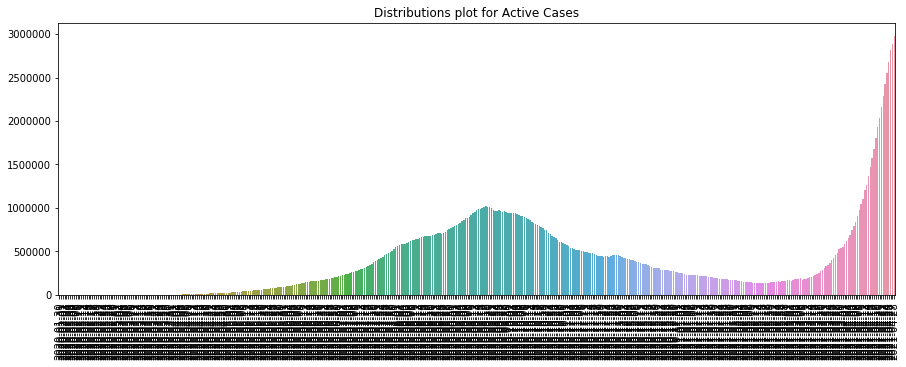

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Cured"]-datewise["Deaths"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

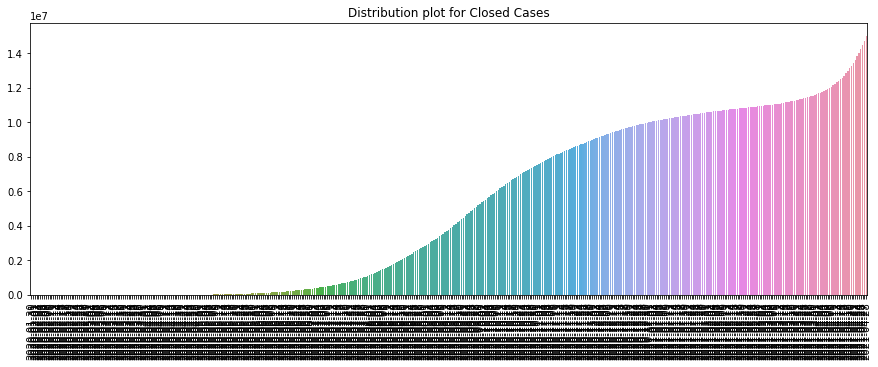

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Cured"]+datewise["Deaths"])
plt.title("Distribution plot for Closed Cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

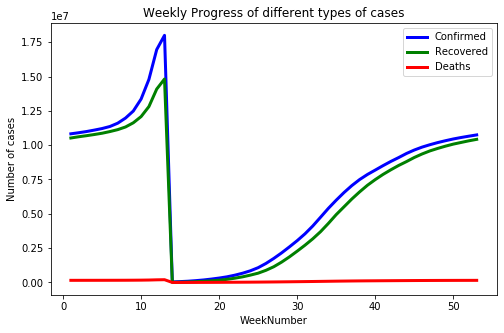

In [11]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Cured"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,'b',linewidth=3)
plt.plot(week_num,weekwise_recovered,'g',linewidth =3)
plt.plot(week_num,weekwise_deaths,'r',linewidth = 3)
plt.legend(['Confirmed','Recovered','Deaths'])
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

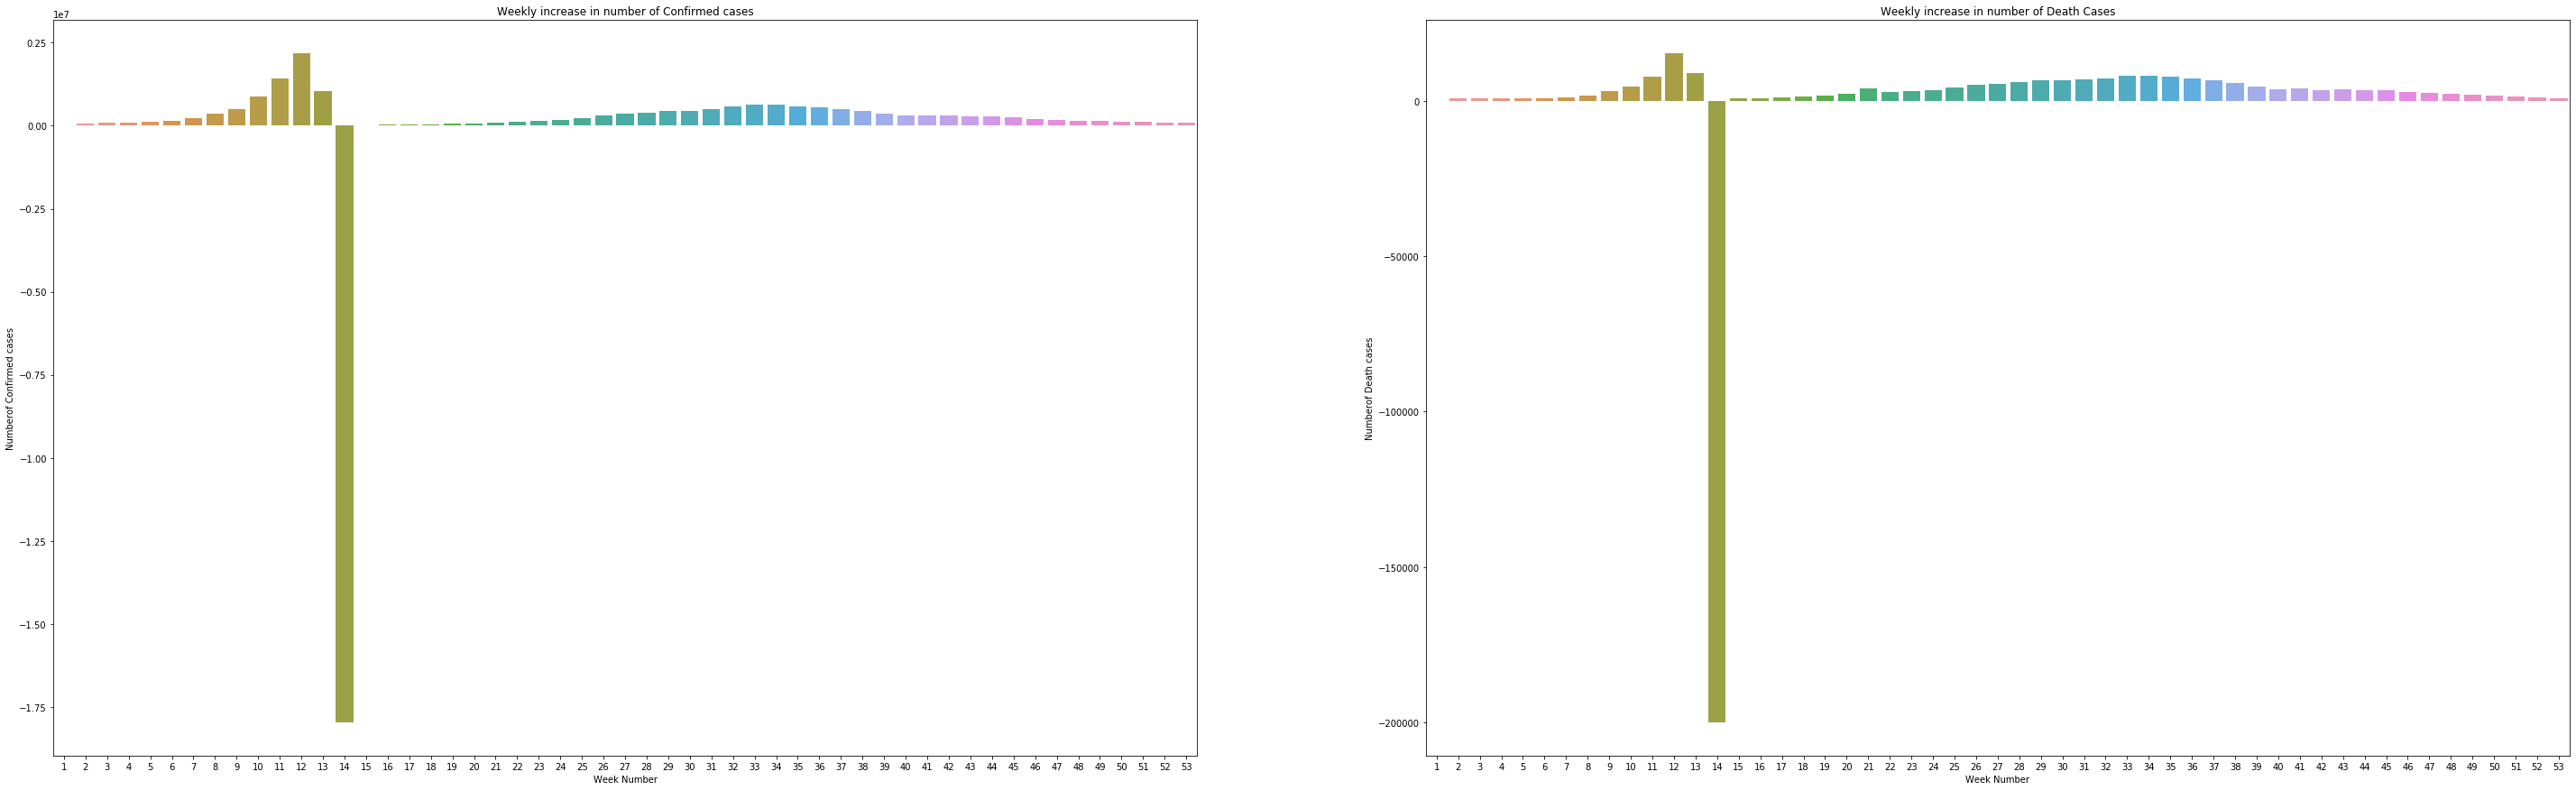

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(50,15))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Numberof Confirmed cases")
ax2.set_ylabel("Numberof Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death Cases")
plt.show()

Average increase in number of Confirmed cases everyday: 39554.0
Average increase in number of Recovered cases everyday: 32566.0
Average increase in number of Death cases everyday: 442.0


C:\Users\nites\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


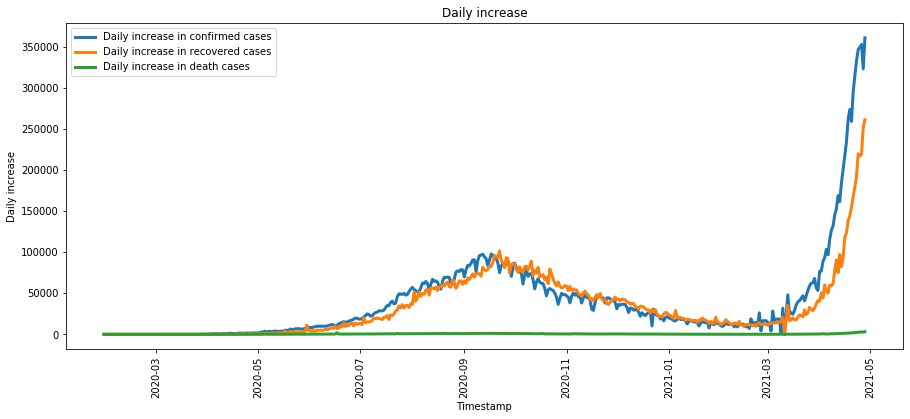

In [13]:
from pandas.plotting import register_matplotlib_converters
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["Cured"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Cured"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [14]:
#State wise analysis
#Calculating State wise Mortality rate
countrywise= covid[covid["Date"]==covid["Date"].max()].groupby(["State/UnionTerritory"]).agg({"Confirmed":"sum","Cured":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Cured"])*100
print("State wise Mortality:",countrywise["Mortality"])
countrywise["Recovered"]=(countrywise["Cured"]/countrywise["Confirmed"])*100
print("State wise Recovered:",countrywise["Recovered"])

State wise Mortality: State/UnionTerritory
Maharashtra                                 1.803465
Kerala                                      0.428094
Karnataka                                   1.365896
Uttar Pradesh                               1.398628
Tamil Nadu                                  1.385381
Delhi                                       1.565407
Andhra Pradesh                              0.823107
West Bengal                                 1.667349
Chhattisgarh                                1.400928
Rajasthan                                   0.980989
Madhya Pradesh                              1.249143
Gujarat                                     1.705665
Haryana                                     1.091468
Bihar                                       0.696100
Odisha                                      0.540679
Telengana                                   0.621957
Punjab                                      2.968533
Assam                                       0.557165
Jha

Text(0.5, 1.0, 'Top 15 states as per number of cases')

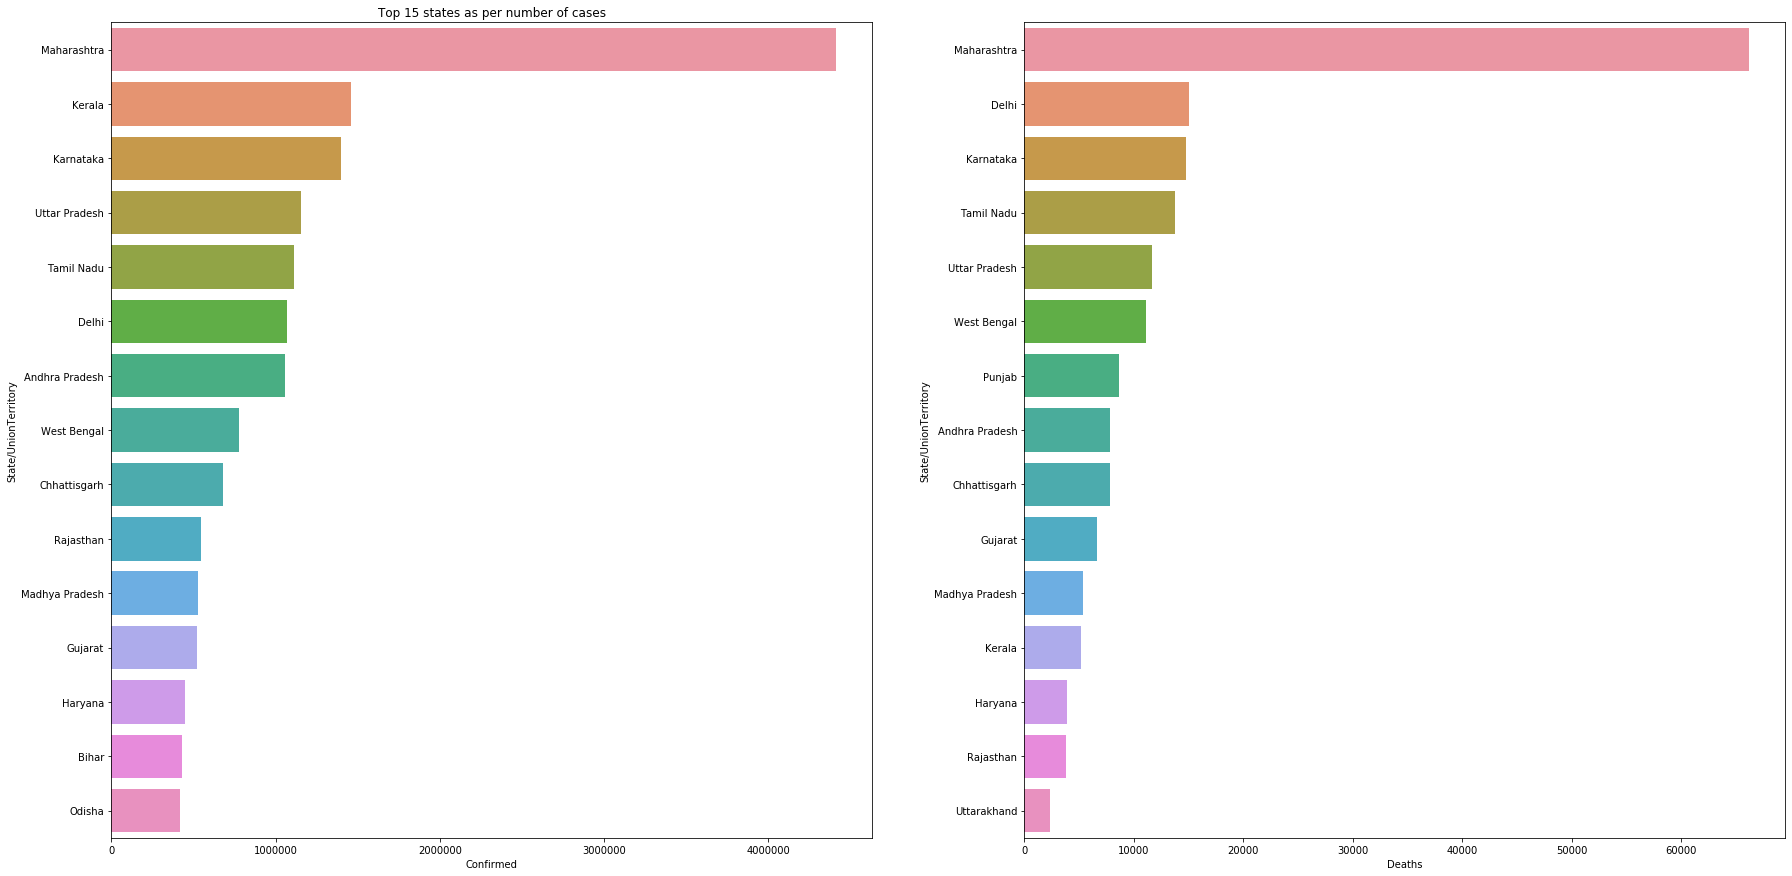

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 states as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax1.set_title("Top 15 states as per number of cases")

In [16]:
#Data Anlaysis for Maharashtra
print("Data Anlaysis for Maharashtra\n")
india_data = covid[covid["State/UnionTerritory"]=="Maharashtra"]
datewise_india = india_data.groupby(["Date"]).agg({"Confirmed":"sum","Cured":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Cured"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_india["Cured"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Data Anlaysis for Maharashtra

Confirmed    4410085
Cured        3669548
Deaths         66179
Name: 2021-04-28 00:00:00, dtype: int64
Total Active Cases 674358
Total Closed Cases 3735727


Text(0.5, 1.0, 'Weekly Progress of different types of cases in India')

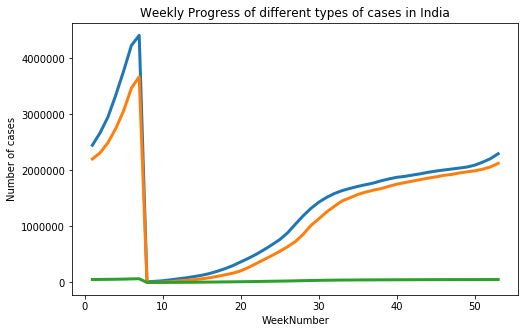

In [17]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Cured"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth =3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases in India")

In [18]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
print(datewise["Days Since"])
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

Date
2020-01-30      0
2020-01-31      1
2020-02-01      2
2020-02-02      3
2020-02-03      4
2020-02-04      5
2020-02-05      6
2020-02-06      7
2020-02-07      8
2020-02-08      9
2020-02-09     10
2020-02-10     11
2020-02-11     12
2020-02-12     13
2020-02-13     14
2020-02-14     15
2020-02-15     16
2020-02-16     17
2020-02-17     18
2020-02-18     19
2020-02-19     20
2020-02-20     21
2020-02-21     22
2020-02-22     23
2020-02-23     24
2020-02-24     25
2020-02-25     26
2020-02-26     27
2020-02-27     28
2020-02-28     29
             ... 
2021-03-30    425
2021-03-31    426
2021-04-01    427
2021-04-02    428
2021-04-03    429
2021-04-04    430
2021-04-05    431
2021-04-06    432
2021-04-07    433
2021-04-08    434
2021-04-09    435
2021-04-10    436
2021-04-11    437
2021-04-12    438
2021-04-13    439
2021-04-14    440
2021-04-15    441
2021-04-16    442
2021-04-17    443
2021-04-18    444
2021-04-19    445
2021-04-20    446
2021-04-21    447
2021-04-22    448
2021-

In [19]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

C:\Users\nites\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [20]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [21]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,11):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(10)

,Dates,LR,SVR
0,2021-04-29,13456170,16665060
1,2021-04-30,13491821,16821806
2,2021-05-01,13527472,16979932
3,2021-05-02,13563124,17139448
4,2021-05-03,13598775,17300363
5,2021-05-04,13634427,17462687
6,2021-05-05,13670078,17626428
7,2021-05-06,13705729,17791597
8,2021-05-07,13741381,17958201
9,2021-05-08,13777032,18126252


In [22]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [23]:
holt=Holt(np.asarray(model_train["Confirmed"]).astype('double')).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

In [24]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,11):
   holt_new_date.append(datewise.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
print("Confirmed Cases")
model_predictions.head(10)

Confirmed Cases


,Dates,LR,SVR,Holts Linear Model Prediction
0,2021-04-29,13456170,16665060,11646060
1,2021-04-30,13491821,16821806,11656110
2,2021-05-01,13527472,16979932,11666161
3,2021-05-02,13563124,17139448,11676211
4,2021-05-03,13598775,17300363,11686261
5,2021-05-04,13634427,17462687,11696312
6,2021-05-05,13670078,17626428,11706362
7,2021-05-06,13705729,17791597,11716413
8,2021-05-07,13741381,17958201,11726463
9,2021-05-08,13777032,18126252,11736513


In [25]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Cured"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Cured"]).reshape(-1,1))

C:\Users\nites\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [26]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [27]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,11):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(10)

,Dates,LR,SVR
0,2021-04-29,12719662,16141367
1,2021-04-30,12753883,16299765
2,2021-05-01,12788104,16459558
3,2021-05-02,12822324,16620757
4,2021-05-03,12856545,16783369
5,2021-05-04,12890766,16947405
6,2021-05-05,12924987,17112873
7,2021-05-06,12959208,17279783
8,2021-05-07,12993428,17448145
9,2021-05-08,13027649,17617967


In [28]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [29]:
holt=Holt(np.asarray(model_train["Cured"]).astype('double')).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

In [30]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,11):
   holt_new_date.append(datewise.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
print("Cured Cases")
model_predictions.head(10)

Cured Cases


,Dates,LR,SVR,Holts Linear Model Prediction
0,2021-04-29,12719662,16141367,11508310
1,2021-04-30,12753883,16299765,11520473
2,2021-05-01,12788104,16459558,11532635
3,2021-05-02,12822324,16620757,11544797
4,2021-05-03,12856545,16783369,11556959
5,2021-05-04,12890766,16947405,11569121
6,2021-05-05,12924987,17112873,11581283
7,2021-05-06,12959208,17279783,11593445
8,2021-05-07,12993428,17448145,11605607
9,2021-05-08,13027649,17617967,11617770


In [31]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,11):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(10)

C:\Users\nites\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Dates,LR,SVR
0,2021-04-29,193841,324540
1,2021-04-30,194343,327856
2,2021-05-01,194845,331202
3,2021-05-02,195346,334576
4,2021-05-03,195848,337981
5,2021-05-04,196349,341415
6,2021-05-05,196851,344879
7,2021-05-06,197352,348374
8,2021-05-07,197854,351899
9,2021-05-08,198355,355454


In [32]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [33]:
holt=Holt(np.asarray(model_train["Deaths"]).astype('double')).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

In [34]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,11):
   holt_new_date.append(datewise.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
print("Death Cases")
model_predictions.head(10)

Death Cases


,Dates,LR,SVR,Holts Linear Model Prediction
0,2021-04-29,193841,324540,162714
1,2021-04-30,194343,327856,162809
2,2021-05-01,194845,331202,162905
3,2021-05-02,195346,334576,163001
4,2021-05-03,195848,337981,163097
5,2021-05-04,196349,341415,163192
6,2021-05-05,196851,344879,163288
7,2021-05-06,197352,348374,163384
8,2021-05-07,197854,351899,163479
9,2021-05-08,198355,355454,163575
